#### Dataset Link : https://archive.ics.uci.edu/ml/datasets/iris

- DD Data Link : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
- DD Data Description Link : https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names


---
- Problem Statement:
1.  Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.

- Steps:
1. Read the dataset
2. Find out any missing values                    2-3 : Data preparation
3. Find out outliers / Correct the outliers
4. Normalization, Encoding
5. Split the data into train and test
6. Apply the Naive bayes algorithm
7. Print/Display the confusion matrix
8. Display the score: accuracy, precision, recall, f-score 

---


In [1]:
!pip3 install numpy
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install sklearn

In [2]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'  

In [3]:
import numpy as NP
import pandas as PD
import seaborn as SNS
import matplotlib.pyplot as MPLOT
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error


---

# Reading the Dataset


- Import Dataset

In [4]:
DF = PD.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
)
DF.sample(10)

,5.1,3.5,1.4,0.2,Iris-setosa
44,4.8,3.0,1.4,0.3,Iris-setosa
95,5.7,2.9,4.2,1.3,Iris-versicolor
99,6.3,3.3,6.0,2.5,Iris-virginica
92,5.0,2.3,3.3,1.0,Iris-versicolor
36,4.9,3.1,1.5,0.1,Iris-setosa
17,5.7,3.8,1.7,0.3,Iris-setosa
81,5.8,2.7,3.9,1.2,Iris-versicolor
73,6.4,2.9,4.3,1.3,Iris-versicolor
83,5.4,3.0,4.5,1.5,Iris-versicolor
31,5.2,4.1,1.5,0.1,Iris-setosa


- No Column Name. Adding Column Name :

Attribute Information:

1.  sepal length in cm
2.  sepal width in cm
3.  petal length in cm
4.  petal width in cm
5.  class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica


In [5]:
print(DF.columns.values)
# adding column name to the respective columns
DF.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
DF.sample(10)

['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']


,sepal_length,sepal_width,petal_length,petal_width,class
135,6.3,3.4,5.6,2.4,Iris-virginica
19,5.4,3.4,1.7,0.2,Iris-setosa
127,6.4,2.8,5.6,2.1,Iris-virginica
25,5.0,3.4,1.6,0.4,Iris-setosa
73,6.4,2.9,4.3,1.3,Iris-versicolor
117,7.7,2.6,6.9,2.3,Iris-virginica
109,6.5,3.2,5.1,2.0,Iris-virginica
22,5.1,3.3,1.7,0.5,Iris-setosa
32,5.5,4.2,1.4,0.2,Iris-setosa
88,5.5,2.5,4.0,1.3,Iris-versicolor


- Checking the size and Shape of data


In [6]:
print("Shape :", DF.shape)
print("Size :", DF.size)

Shape : (149, 5)
Size : 745


- Getting Datatype of Columns (Data Frame)


In [7]:
DF.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

- Data Summary of Dataset


In [8]:
DF.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- Data Groupby Description


In [9]:
DF.groupby(DF["class"]).describe().transpose()

class               Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    49.000000        50.000000       50.000000
             mean      5.004082         5.936000        6.588000
             std       0.355879         0.516171        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.200000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    49.000000        50.000000       50.000000
             mean      3.416327         2.770000        2.974000
             std       0.384787         0.313798        0.322497
             min       2.300000         2.000000        2.200000
             25%       3.100000         2.525000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.700000         3.000000        3.175000
             max       4.400000         3.400000        3.800000
petal_length count    49.000000        50.000000       50.000000
             mean      1.465306         4.260000        5.552000
             std       0.175061         0.469911        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.350000        5.550000
             75%       1.600000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    49.000000        50.000000       50.000000
             mean      0.244898         1.326000        2.026000
             std       0.108130         0.197753        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

---

# Finding Missing Values


- Checking for N/A Values


In [10]:
DF.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

- Checking for NULL Values


In [11]:
DF.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

---

# Finding Outliers and removing...


- Plotting boxplot for Dataframe


<AxesSubplot:>

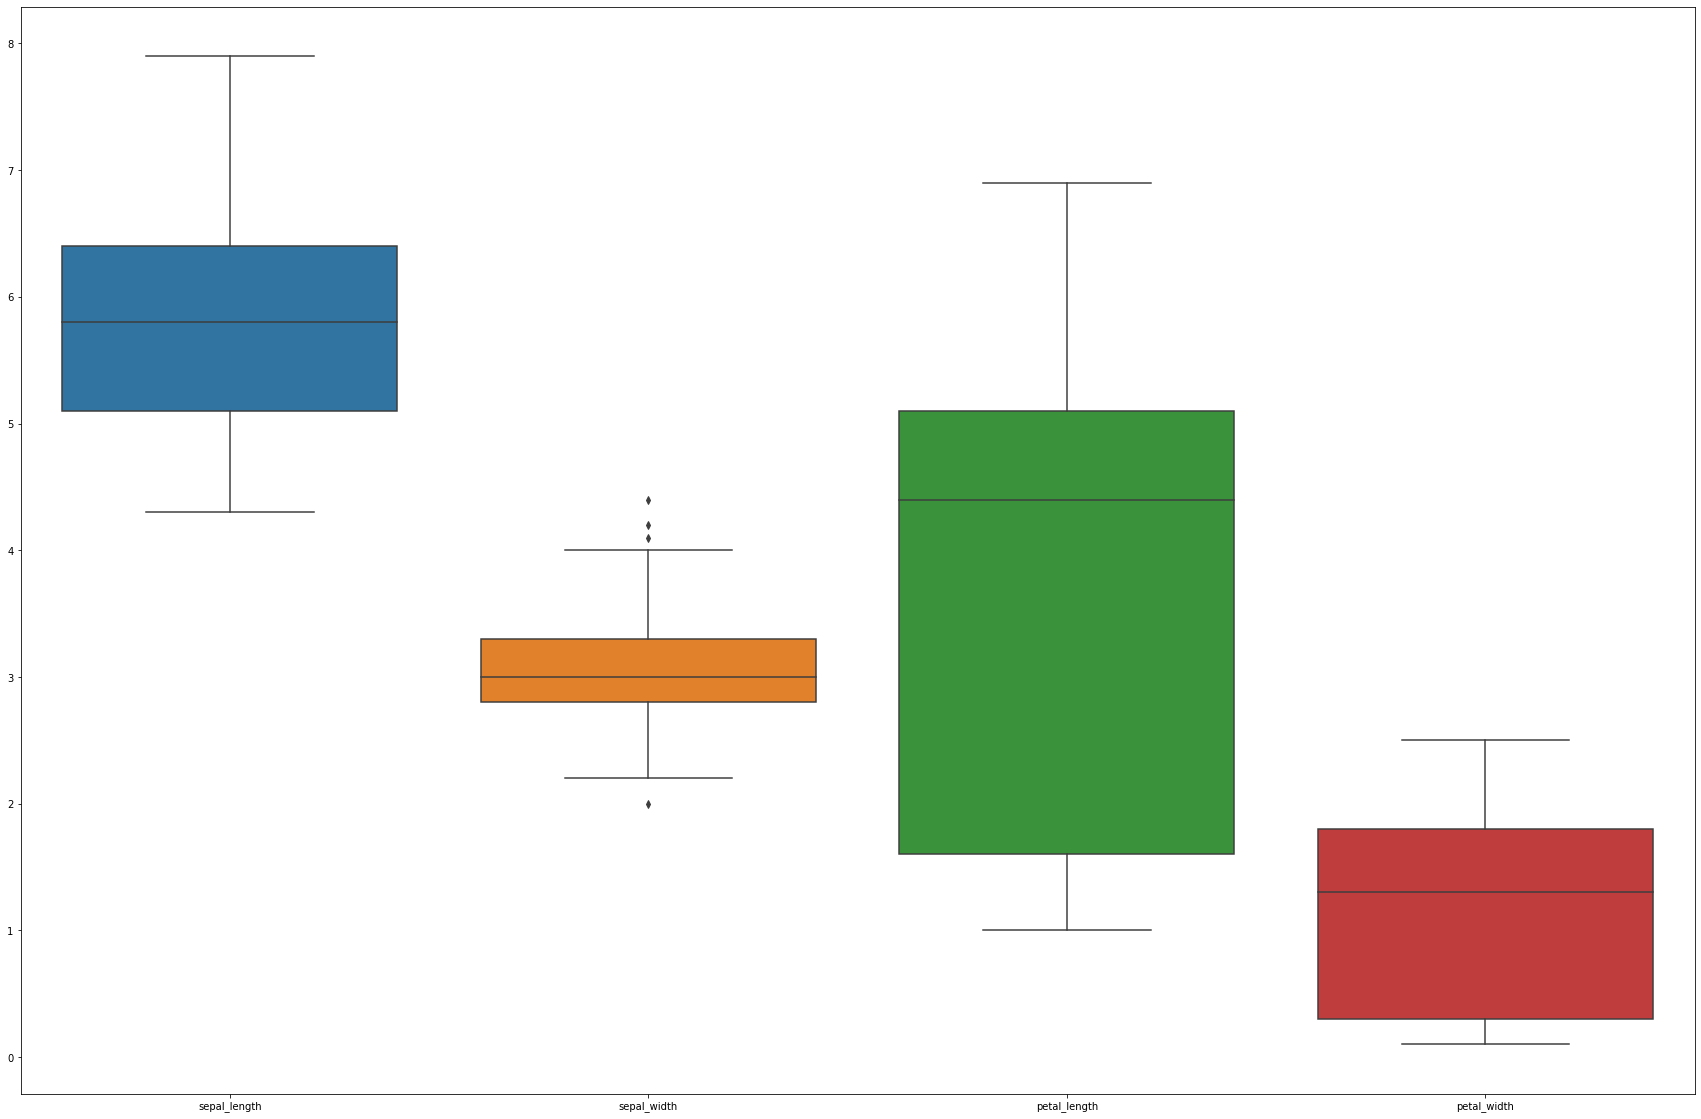

In [12]:

SNS.boxplot(data=DF, ax=ax)

- Creating a Custom Function to Detect Outliers


In [13]:
def Only_Detect_Outliers(DataFrame, Col_Name):
    Q1 = NP.percentile(DF[Col_Name], 25, interpolation="midpoint")
    Q3 = NP.percentile(DF[Col_Name], 75, interpolation="midpoint")
    IQR = Q3 - Q1
    Upper_Threshold = Q3 + 1.5 * IQR
    Lower_Threshold = Q1 - 1.5 * IQR
    Count = DataFrame[
        (DataFrame[Col_Name] >= Upper_Threshold)
        | (DataFrame[Col_Name] <= Lower_Threshold)
    ][Col_Name].count()
    print(
        "[ * ] In",
        str(Col_Name),
        "->",
        "High :",
        Upper_Threshold,
        "| Low :",
        Lower_Threshold,
        "| -> Outliers Detected :",
        Count,
    )

- Calling Custom Outlier Detector Function


In [14]:
Only_Detect_Outliers(DF, "sepal_length")
Only_Detect_Outliers(DF, "sepal_width")
Only_Detect_Outliers(DF, "petal_length")
Only_Detect_Outliers(DF, "petal_width")

[ * ] In sepal_length -> High : 8.350000000000001 | Low : 3.1499999999999986 | -> Outliers Detected : 0
[ * ] In sepal_width -> High : 4.05 | Low : 2.05 | -> Outliers Detected : 4
[ * ] In petal_length -> High : 10.349999999999998 | Low : -3.649999999999999 | -> Outliers Detected : 0
[ * ] In petal_width -> High : 4.05 | Low : -1.95 | -> Outliers Detected : 0


/tmp/ipykernel_7056/1885621298.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = NP.percentile(DF[Col_Name], 25, interpolation="midpoint")
/tmp/ipykernel_7056/1885621298.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = NP.percentile(DF[Col_Name], 75, interpolation="midpoint")


- Found Outliers in Sepal Width. Confirming with a Box Plot


<AxesSubplot:xlabel='sepal_width'>

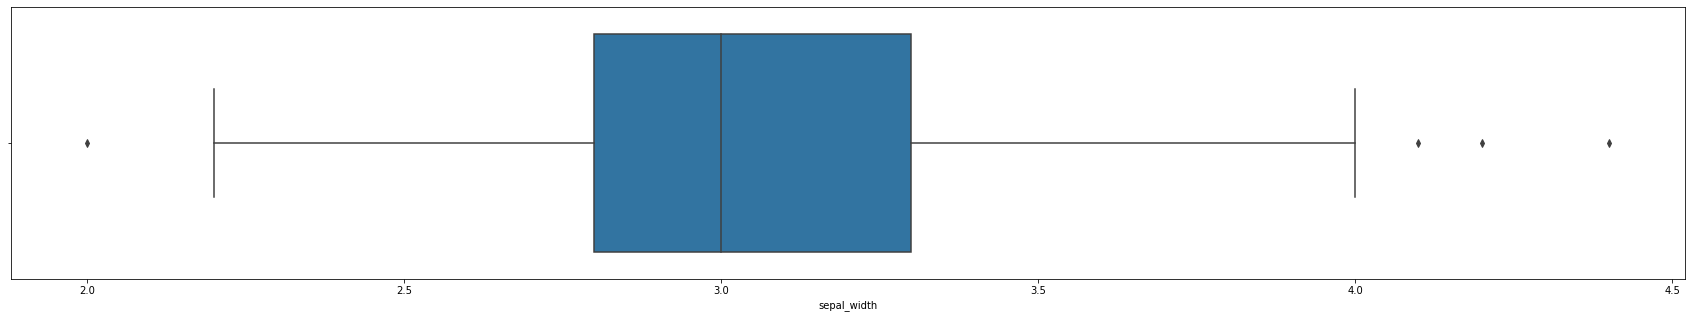

In [15]:
fig, ax = MPLOT.subplots(figsize=(30, 5))
SNS.boxplot(x=DF["sepal_width"])

- Getting Minimum and Maximum of Box Plot


In [16]:
Q1 = NP.percentile(DF["sepal_width"], 25, interpolation="midpoint")
Q3 = NP.percentile(DF["sepal_width"], 75, interpolation="midpoint")
IQR = Q3 - Q1
Upper_Threshold = Q3 + 1.5 * IQR
Lower_Threshold = Q1 - 1.5 * IQR
print("Highest allowed :", Upper_Threshold)
print("Lowest allowed : ", Lower_Threshold)

Highest allowed : 4.05
Lowest allowed :  2.05


/tmp/ipykernel_7056/1526579361.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = NP.percentile(DF["sepal_width"], 25, interpolation="midpoint")
/tmp/ipykernel_7056/1526579361.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = NP.percentile(DF["sepal_width"], 75, interpolation="midpoint")


- Checking for row(s) with sepal_width <= 2.05


In [17]:
DF[(DF["sepal_width"] <= 2.05)]

,sepal_length,sepal_width,petal_length,petal_width,class
59,5.0,2.0,3.5,1.0,Iris-versicolor


- Checking for row(s) with sepal_width >= 4.05


In [18]:
DF[(DF["sepal_width"] >= 4.05)]

,sepal_length,sepal_width,petal_length,petal_width,class
14,5.7,4.4,1.5,0.4,Iris-setosa
31,5.2,4.1,1.5,0.1,Iris-setosa
32,5.5,4.2,1.4,0.2,Iris-setosa


- Dropping those rows and plotting box plot


<AxesSubplot:xlabel='sepal_width'>

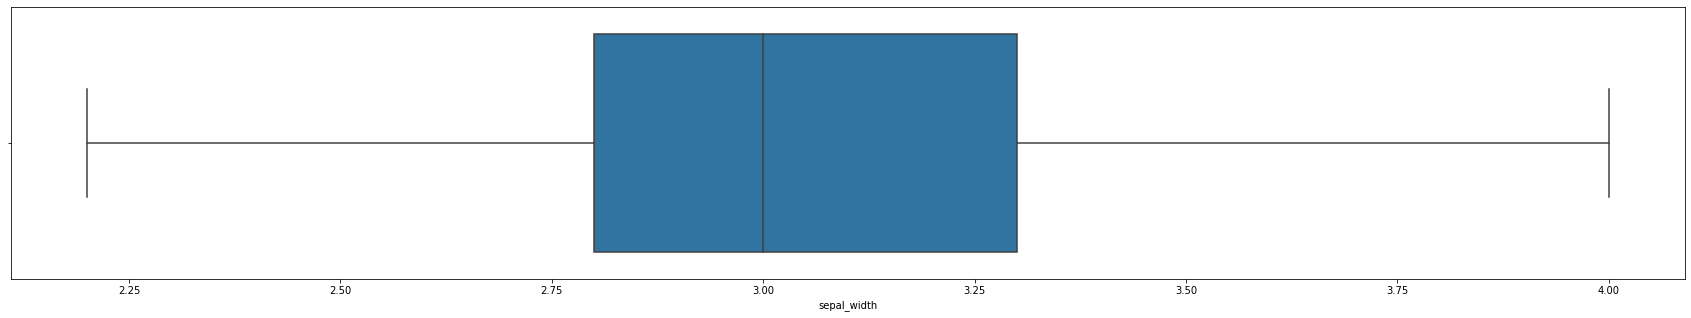

In [19]:
DF = DF.drop([59, 14, 31, 32])

fig, ax = MPLOT.subplots(figsize=(30, 5))
SNS.boxplot(x=DF["sepal_width"])

- Again Checking for any Outliers with Custom Function


In [20]:
Only_Detect_Outliers(DF, "sepal_length")
Only_Detect_Outliers(DF, "sepal_width")
Only_Detect_Outliers(DF, "petal_length")
Only_Detect_Outliers(DF, "petal_width")

[ * ] In sepal_length -> High : 8.350000000000001 | Low : 3.1499999999999986 | -> Outliers Detected : 0
[ * ] In sepal_width -> High : 4.05 | Low : 2.05 | -> Outliers Detected : 0
[ * ] In petal_length -> High : 10.349999999999998 | Low : -3.649999999999999 | -> Outliers Detected : 0
[ * ] In petal_width -> High : 4.05 | Low : -1.95 | -> Outliers Detected : 0


/tmp/ipykernel_7056/1885621298.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = NP.percentile(DF[Col_Name], 25, interpolation="midpoint")
/tmp/ipykernel_7056/1885621298.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = NP.percentile(DF[Col_Name], 75, interpolation="midpoint")


In [21]:
DF.groupby(DF["class"]).describe().transpose()

class               Iris-setosa  Iris-versicolor  Iris-virginica
sepal_length count    46.000000        49.000000       50.000000
             mean      4.973913         5.955102        6.588000
             std       0.342173         0.503348        0.635880
             min       4.300000         4.900000        4.900000
             25%       4.800000         5.600000        6.225000
             50%       5.000000         5.900000        6.500000
             75%       5.100000         6.300000        6.900000
             max       5.800000         7.000000        7.900000
sepal_width  count    46.000000        49.000000       50.000000
             mean      3.363043         2.785714        2.974000
             std       0.330897         0.296507        0.322497
             min       2.300000         2.200000        2.200000
             25%       3.100000         2.600000        2.800000
             50%       3.400000         2.800000        3.000000
             75%       3.575000         3.000000        3.175000
             max       4.000000         3.400000        3.800000
petal_length count    46.000000        49.000000       50.000000
             mean      1.465217         4.275510        5.552000
             std       0.180391         0.461668        0.551895
             min       1.000000         3.000000        4.500000
             25%       1.400000         4.000000        5.100000
             50%       1.500000         4.400000        5.550000
             75%       1.600000         4.600000        5.875000
             max       1.900000         5.100000        6.900000
petal_width  count    46.000000        49.000000       50.000000
             mean      0.245652         1.332653        2.026000
             std       0.106888         0.194066        0.274650
             min       0.100000         1.000000        1.400000
             25%       0.200000         1.200000        1.800000
             50%       0.200000         1.300000        2.000000
             75%       0.300000         1.500000        2.300000
             max       0.600000         1.800000        2.500000

- No Outliers. We are good to go for further steps


---

# Plotting Corelation Matrix and Scatter Plot


In [22]:
DF.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.107413,0.878989,0.821611
sepal_width,-0.107413,1.000000,-0.390380,-0.322420
petal_length,0.878989,-0.390380,1.000000,0.961264
petal_width,0.821611,-0.322420,0.961264,1.000000


In [23]:
original = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
category = [0, 1, 2]
DF["class"].replace(original, category, inplace=True)

- Plotting the Heatmap


<AxesSubplot:>

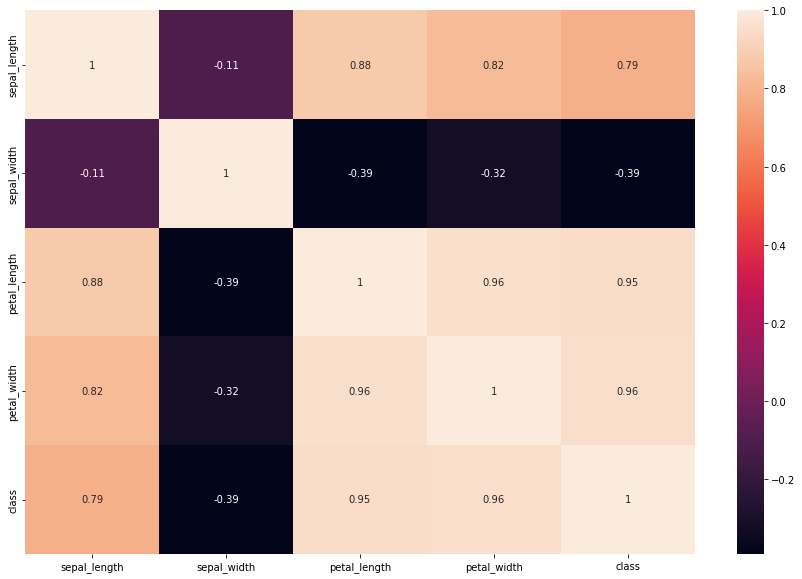

In [24]:
fig, ax = MPLOT.subplots(figsize=(15, 10))
SNS.heatmap(DF.corr(), annot=True, ax=ax)

In [25]:
original = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
category = [0, 1, 2]
DF["class"].replace(category, original, inplace=True)

- Plotting All Variables ScatterPlots


<AxesSubplot:>

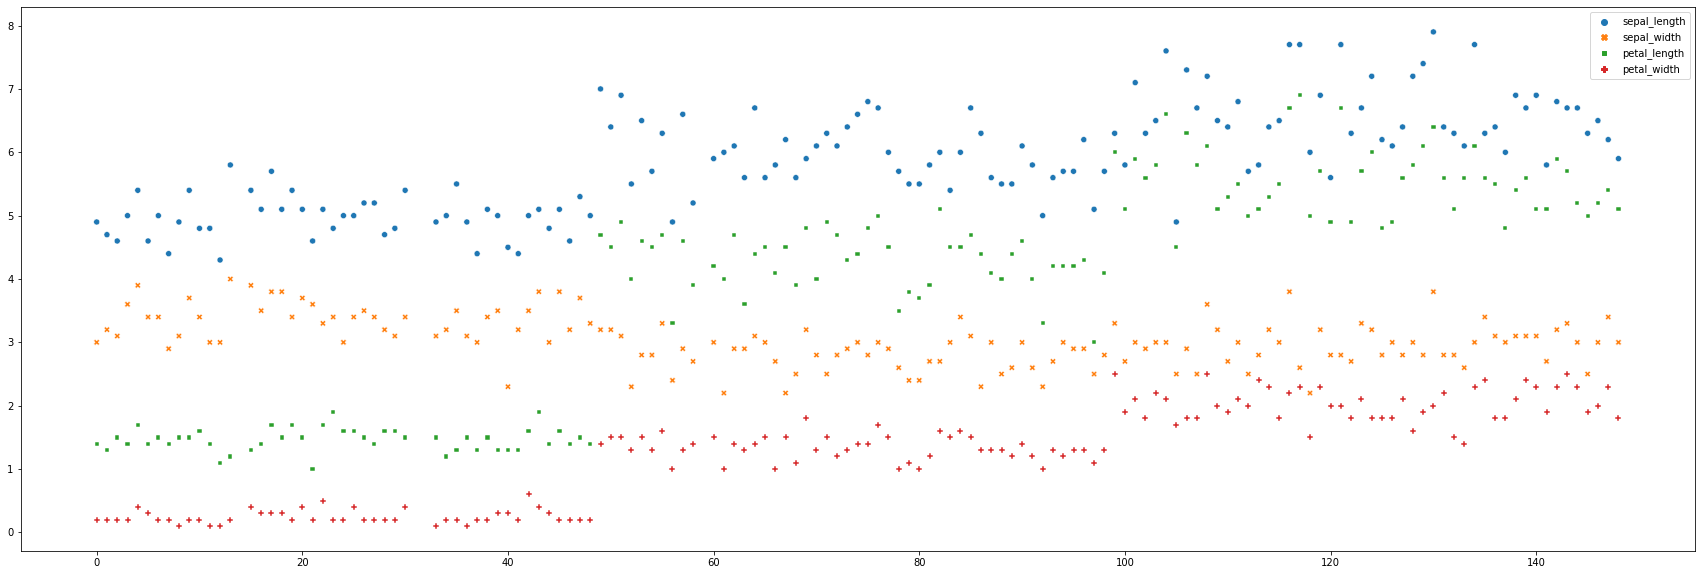

In [26]:
fig, ax = MPLOT.subplots(figsize=(30, 10))
SNS.scatterplot(data=DF, ax=ax)


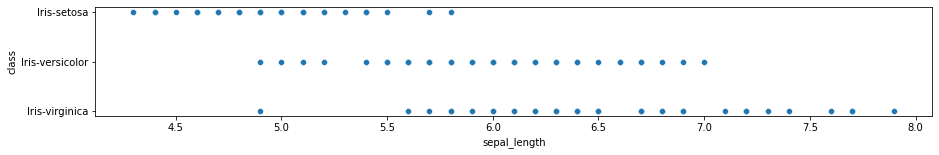

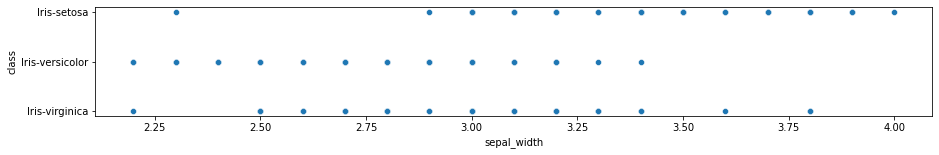

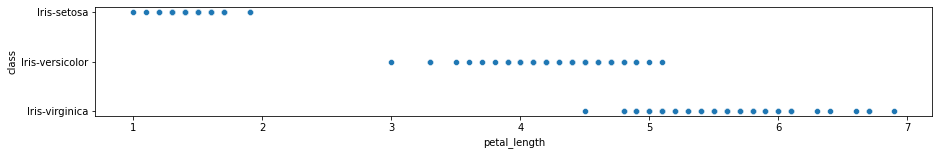

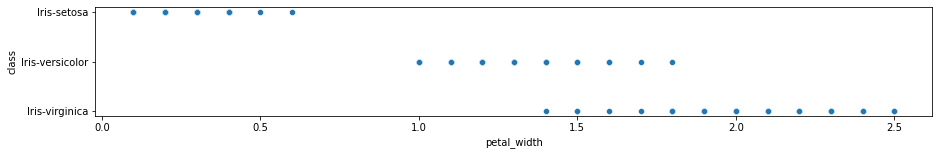

In [27]:
for col_name in ["sepal_length", "sepal_width", "petal_length", "petal_width"]:
    fig, ax = MPLOT.subplots(figsize=(15, 2))
    SNS.scatterplot(x=DF[col_name], y=DF["class"], ax=ax)


---

# Encoding


In [28]:
DF.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [29]:
DF.sample(10)


,sepal_length,sepal_width,petal_length,petal_width,class
81,5.8,2.7,3.9,1.2,Iris-versicolor
82,6.0,2.7,5.1,1.6,Iris-versicolor
46,4.6,3.2,1.4,0.2,Iris-setosa
91,5.8,2.6,4.0,1.2,Iris-versicolor
16,5.1,3.5,1.4,0.3,Iris-setosa
51,6.9,3.1,4.9,1.5,Iris-versicolor
116,7.7,3.8,6.7,2.2,Iris-virginica
55,6.3,3.3,4.7,1.6,Iris-versicolor
148,5.9,3.0,5.1,1.8,Iris-virginica
100,5.8,2.7,5.1,1.9,Iris-virginica


In [30]:
DF.groupby("class").count()


,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,46,46,46,46
Iris-versicolor,49,49,49,49
Iris-virginica,50,50,50,50


- Encoding Data to Category
  - 0 - 'Iris-setosa'
  - 1 - 'Iris-versicolor'
  - 2 - 'Iris-virginica'


In [31]:
original = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
category = [0, 1, 2]

DF["class"].replace(original, category, inplace=True)

DF["class"] = DF["class"].astype("category")


In [32]:
DF.dtypes


sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
class           category
dtype: object

In [33]:
DF.sample(10)


,sepal_length,sepal_width,petal_length,petal_width,class
48,5.0,3.3,1.4,0.2,0
133,6.1,2.6,5.6,1.4,2
118,6.0,2.2,5.0,1.5,2
36,4.9,3.1,1.5,0.1,0
112,5.7,2.5,5.0,2.0,2
50,6.4,3.2,4.5,1.5,1
24,5.0,3.0,1.6,0.2,0
125,6.2,2.8,4.8,1.8,2
64,6.7,3.1,4.4,1.4,1
61,6.0,2.2,4.0,1.0,1


In [34]:
DF.groupby("class").count()


,sepal_length,sepal_width,petal_length,petal_width
class,,,,
0,46,46,46,46
1,49,49,49,49
2,50,50,50,50


---

# Training Model


In [35]:
def Model_Trainer(ModelMethod, X_TRAIN, X_TEST, Y_TRAIN, Y_TEST):
    model = ModelMethod
    model.fit(X_TRAIN, Y_TRAIN)
    Y_PRED = model.predict(X_TEST)
    MAE = mean_absolute_error(Y_TEST, Y_PRED)
    ACC = model.score(X_TEST, Y_TEST)
    print("Mean Absolute Error :", MAE)
    print("Model Accuracy :", model.score(X_TEST, Y_TEST))
    try:
        CONF_MAT = confusion_matrix(Y_TEST, Y_PRED)
        SCORE = precision_recall_fscore_support(Y_TEST, Y_PRED, average="macro")
        print(
            "Confusion Matrix -> ",
            "\n",CONF_MAT,

            "\n\n    Actual : Predicted "
            "\n    Setosa : Setosa     ", CONF_MAT[0][0],
            "\n    Setosa : VersiColor ", CONF_MAT[0][1],
            "\n    Setosa : Virginica  ", CONF_MAT[0][2],
            "\nVersiColor : Setosa     ", CONF_MAT[1][0],
            "\nVersiColor : VersiColor ", CONF_MAT[1][1],
            "\nVersiColor : Virginica  ", CONF_MAT[1][2],
            "\n Virginica : Setosa     ", CONF_MAT[2][0],
            "\n Virginica : VersiColor ", CONF_MAT[2][1],
            "\n Virginica : Virginica  ", CONF_MAT[2][2],
            "\n\n"
        )
        print("Precision :", SCORE[0])
        print("Recall :", SCORE[1])
        print("F-Score :", SCORE[2])
        return MAE, ACC, CONF_MAT, SCORE

    except:
        return MAE, ACC, [[None]*3]*3, [None]*4
    
    finally:
        print("-" * 40)



In [36]:
def feature_scaling(ScalerMethod, X_TRAIN, X_TEST):

    scale = ScalerMethod
    X_TRAIN = scale.fit_transform(X_TRAIN)
    X_TEST = scale.transform(X_TEST)
    
    return X_TRAIN, X_TEST

In [63]:
def Quick_Data_Split_n_Model_Trainer(Input_Data, Output_Data):
    print("*" * 60)
    print("[ ! ] Input : ", Input_Data.columns.values, "| Output : ", Output_Data.name, "\n"*2)

    # Select_Test_Train_SPLIT_Model = [train_test_split(), StratifiedShuffleSplit()]
    # Select_Test_Train_SPLIT_Model = [train_test_split(), StratifiedShuffleSplit()]
    X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(
        Input_Data, 
        Output_Data, 
        test_size=0.25, 
        random_state=42,
        stratify=Output_Data
    )
    

    mMScale_X_TRAIN, mMScale_X_TEST = feature_scaling(MinMaxScaler(), X_TRAIN, X_TEST)
    StdScaler_X_TRAIN, StdScaler_X_TEST = feature_scaling(StandardScaler(), X_TRAIN, X_TEST)

    Select_X_TRAIN = [X_TRAIN, mMScale_X_TRAIN, StdScaler_X_TRAIN]
    Select_X_TEST  = [X_TEST,  mMScale_X_TEST,  StdScaler_X_TEST]

    Select_MODEL = [LinearRegression(), LogisticRegression(), GaussianNB()]

    # Select_Test_Train_SPLIT_Model = [train_test_split(), StratifiedShuffleSplit()]

    MOD_TRN_SUMM_DATA  = [[0 for _ in range(3)] for _ in range(3)]

    for ModelTrainMethod in  Select_MODEL:
        for ScalerMethod in [0,1,2] :
            x = Select_MODEL.index(ModelTrainMethod)
            y = ScalerMethod

            print("[",x,"][",y,"] ->",
                "Training Method :",str(ModelTrainMethod),"| Scaler Method :", 
                {
                    0: "N/A", 
                    1: "MinMaxScaler", 
                    2: "StandardScaler"
                }.get(ScalerMethod, "Unknown")
            )

            print("Y_TRAIN :\n", Y_TRAIN.value_counts())
            print("*"*10)
            print("Y_TEST :\n", Y_TEST.value_counts())
            print("*"*10)

            MOD_TRN_SUMM_DATA[x][y] = Model_Trainer(
                    ModelTrainMethod, 
                    Select_X_TRAIN[ScalerMethod],
                    Select_X_TEST[ScalerMethod], 
                    Y_TRAIN, 
                    Y_TEST
                )

    print("\n" * 4)

    return MOD_TRN_SUMM_DATA

In [64]:
y = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

inputs_arr = [
    [ y[0], y[1] ],
    [ y[1], y[2] ],
    [ y[2], y[3] ],
    [ y[0], y[3] ],
    [ y[1], y[2], y[3] ],
    [ y[0], y[2], y[3] ],
    [ y[0], y[1], y[3] ],
    [ y[0], y[1], y[2] ],
    [ y[0], y[1], y[2], y[3] ]
]

SUMM_UP_DATA = [[0 for _ in range(9)] for _ in range(9)]

for input_data in inputs_arr:
    SUMM_UP_DATA[inputs_arr.index(input_data)] = Quick_Data_Split_n_Model_Trainer(DF[input_data], DF["class"])

************************************************************
[ ! ] Input :  ['sepal_length' 'sepal_width'] | Output :  class 


[ 0 ][ 0 ] -> Training Method : LinearRegression() | Scaler Method : N/A
Y_TRAIN :
 1    37
2    37
0    34
Name: class, dtype: int64
**********
Y_TEST :
 2    13
0    12
1    12
Name: class, dtype: int64
**********
Mean Absolute Error : 0.341270615940204
Model Accuracy : 0.733584466994025
----------------------------------------
[ 0 ][ 1 ] -> Training Method : LinearRegression() | Scaler Method : MinMaxScaler
Y_TRAIN :
 1    37
2    37
0    34
Name: class, dtype: int64
**********
Y_TEST :
 2    13
0    12
1    12
Name: class, dtype: int64
**********
Mean Absolute Error : 0.34127061594020414
Model Accuracy : 0.7335844669940248
----------------------------------------
[ 0 ][ 2 ] -> Training Method : LinearRegression() | Scaler Method : StandardScaler
Y_TRAIN :
 1    37
2    37
0    34
Name: class, dtype: int64
**********
Y_TEST :
 2    13
0    12
1    12
Name: 

--- 
# Summarizing Everything

In [ ]:
SUMM_UP_DATA

In [ ]:
barWidth = 0.15
fig = MPLOT.subplots(figsize =(30, 15))
 
# set height of bar
outliers_and_no_norm = [ 0.5739577415025858, 0.4738047952188048, 0.48426471238253344, 0.549867883942468, 0.6237952757915204, 0.4018068071390196, 0.6232538193298415, 0.5289984789622016, 0.5784397814546065, 0.6302528487272827, 0.628420675407839 ]
no_outliers_and_no_norm = [ 0.5707756956537006, 0.3785351362452488, 0.42135202821536055, 0.5151382042361962, 0.5483688926590018, 0.1482510677156117, 0.5359354082378105, 0.42063874169720794, 0.5446632170641079, 0.5836276654856962, 0.5707497199016172 ]
no_outliers_and_norm = [ 0.49485441393070373, 0.13971703014567904, 0.2182171714061114, 0.523720523365256, 0.5642802129007987, 0.09382667556021662, 0.5481783399665785, 0.21558389290626723, 0.44883096982695536, 0.5154702317232409, 0.4927639000853453 ]



# Set position of bar on X axis
br1 = NP.arange(len(outliers_and_no_norm))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
MPLOT.bar(br1, outliers_and_no_norm, color ='r', width = barWidth,
        edgecolor ='black', label ='Outliers and No Normalization in Data')
MPLOT.bar(br2, no_outliers_and_no_norm, color ='g', width = barWidth,
        edgecolor ='black', label ='Outliers Removed But Data Not Normalized')
MPLOT.bar(br3, no_outliers_and_norm, color ='b', width = barWidth,
        edgecolor ='black', label ='Outliers Removed and Data Normalized')

 

y = ["sepal_length", "sepal_width", "petal_length", "petal_width"]


# Adding Xticks
MPLOT.xlabel('Model Input', fontweight ='bold', fontsize = 15)
MPLOT.ylabel('Model Accuracy', fontweight ='bold', fontsize = 15)
MPLOT.xticks([r + barWidth for r in range(len(outliers_and_no_norm))],
        [       
                str([ y[0], y[1] ]),
                str([ y[1], y[2] ]),
                str([ y[2], y[3] ]),
                str([ y[0], y[3] ]),
                str([ y[1], y[2], y[3] ]),
                str([ y[0], y[2], y[3] ]),
                str([ y[0], y[1], y[3] ]),
                str([ y[0], y[1], y[2] ]),
                str([ y[0], y[1], y[2], y[3] ])
        ])


 
MPLOT.legend()
MPLOT.show()

In [ ]:
#model_input------------------------------
y = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

inputs_arr = [
    [ y[0], y[1] ],
    [ y[1], y[2] ],
    [ y[2], y[3] ],
    [ y[0], y[3] ],
    [ y[1], y[2], y[3] ],
    [ y[0], y[2], y[3] ],
    [ y[0], y[1], y[3] ],
    [ y[0], y[1], y[2] ],
    [ y[0], y[1], y[2], y[3] ]
]


#train_model_method-----------------------------
train_methods = [LinearRegression(), LogisticRegression(), GaussianNB()]

#scaler_method-----------------------------
scaler_methods = [None, MinMaxScaler(), StandardScaler()]

#metric-----------------------------
metrics = ["Mean Absolute Error", "Model Accuracy", "Confusion Matrix", "Precision Recall FScore"]


for model_input in range(len(inputs_arr)):
    for train_model_method in range(len(train_methods)):
        for scaler_method in range(len(scaler_methods)):
            for metric in range(len(metrics)):
                print(SUMM_UP_DATA[model_input][train_model_method][scaler_method][metric])
                SUMM_UP_DATA[model_input][train_model_method][scaler_method][metric][]
            print()
        print()
    print()